## Preparación del entorno

In [1]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

Si el entorno está correctamente instalado, las líneas de código anteriores deben importar los paquetes sin ningún error.

Nota: para el resto de las preguntas y soluciones de código, puede ingresar más celdas si lo considera necesario.


## Carga y estudio de datos

Cargue los datos desde el archivo *adult_data.csv*. Para esto puede utilizar la librería *pandas* con su función *read_csv*.

In [2]:
filename = "datos_entrenamiento.csv"
adult_data = pd.read_csv(filename,delimiter=',')
#definimos el pipeline
pipe_ann = Pipeline([
    ('classify', MLPClassifier())
])
C_OPTIONS = [(400,400,400,400,400)]
param_grid_ann = [
    {
        'classify__hidden_layer_sizes': C_OPTIONS
    }
]
#generamos un grid search para obtener el fit con los mejores parámetros
grid_ann = GridSearchCV(pipe_ann, cv=3, n_jobs=2, param_grid=param_grid_ann)
grid_ann.fit(train.iloc[:,:63], train.y)




In [ ]:
best_parameters_ann = grid_ann.best_estimator_.get_params()
print best_parameters_ann['classify__hidden_layer_sizes']
#se predicen los valores a partir del grid search
ann_out = grid_ann.predict(test.iloc[:,:63])

Imprima los nombres de las columnas (atributos).

In [3]:
print list(adult_data.columns.values)
print len(adult_data.columns.values)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
15


## Extracción de atributos

Separar la columna **income** en un array **y** que será utilizada como atributo clase:

In [4]:
y = pd.DataFrame(adult_data.iloc[:,14])
adult_data = adult_data.iloc[:,:14] #ya remueve la columna "income"

In [5]:
print list(adult_data.columns.values)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


Eliminar la columna **fnlwgt** ya que no aporta a la solución del problema. También eliminar la columna **education-num** ya que duplica la información de la columna 'education'. Por último, eliminar la columna **income** ya que es la columna que contiene la clase que se pretende predecir:

In [6]:
adult_data = adult_data.drop(['fnlwgt','education-num'], axis=1)
print list(adult_data.columns.values)

['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


Los atributos cuyos valores son categorías ('workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'), deben de transformarse a valores numéricos para poder ser utilizados como entradas en los modelos de scikit-learn.

**PREGUNTA: ¿Por qué no es apropiado transformar un atributo de categoría en simples índices numéricos?**

**RESPUESTA: ** Una representación con índices numéricos no puede ser usada directamente con los estimadores de scikit-learn, porque estos esperan entradas continuas, y así interpretarán que las categorías están ordenadas, lo cual no siempre es válido.

Utilice las clases *LabelEncoder* y *OneHotEncoder* del paquete *preprocessing* de *sklearn* para transformar los atributos de categorías en atributos numéricos. Guarde los datos de entrada en una matriz **X**.

In [7]:
from sklearn import preprocessing
import copy

#función auxiliar para obtener la diferencia entre dos listas de elementos
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

data = copy.deepcopy(adult_data)
original_headers = data.columns.values
headers = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
diff_headers = diff(original_headers,headers)

#Esta variable guardará la cantidad total de nuevos atributos
attr = 0
#Esta variable guardará los nuevos atributos por elemento del header
dic = {}
#Esta variable guardará los resultados del OneHotEncoder para cada elemento de Header.
hot_encoder_results = []

new = None
for header in headers:
    # esta lista guardará los atributos por header, para luego incluirlos 
    # en el diccionario dic
    attr_por_header = []
    
    
    le = preprocessing.LabelEncoder()
    data[header] = le.fit_transform(data[header])
    
    # hacemos el tratamiento de los nombres de las variables para tener referencia de los mismos
    # en particular para la pregunta siguiente.
    for value in le.classes_:
        #guardamos el atributo en la lista
        attr_por_header.append(header+"."+value.strip())
        
        
        
    #guardamos la lista en el diccionario
    dic[header] = attr_por_header
    attr += len(attr_por_header)
    
    encoder = preprocessing.OneHotEncoder()
    hot_encoder = encoder.fit_transform(data[[header]])
    hot_encoder_results.append(pd.DataFrame(hot_encoder.toarray(),columns = attr_por_header))

#obtenemos y agregamos el resto de las variables originales que no fueron modificadas
for value in diff_headers:
    hot_encoder_results.append(pd.DataFrame(data[value],columns = [value]))

#generamos el dataframe que será utilizado como datos de entrenamiento/prueba
X = pd.concat(hot_encoder_results,axis=1)
pd.concat(hot_encoder_results,axis=1)

,workclass.?,workclass.Federal-gov,workclass.Local-gov,workclass.Private,workclass.Self-emp-inc,workclass.Self-emp-not-inc,workclass.State-gov,workclass.Without-pay,education.10th,education.11th,...,native-country.Taiwan,native-country.Thailand,native-country.Trinadad&Tobago,native-country.United-States,native-country.Vietnam,native-country.Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,39,2174,0,40
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,50,0,0,13
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,38,0,0,40
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,53,0,0,40
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28,0,0,40
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,37,0,0,40
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,0,0,16
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,52,0,0,45
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,31,14084,0,50
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,42,5178,0,40


**PREGUNTA: ¿Cuántos y cuáles son los nuevos atributos del dataset?**

**RESPUESTA:**

In [8]:
for header in headers:
    print "Para el atributo " + header + " se crean los nuevos atributos: ",
    print list(dic[header]),
    print "\n"

print "Teniendo un total de:", 
print attr,
print "nuevos atributos"

Para el atributo workclass se crean los nuevos atributos:  ['workclass.?', 'workclass.Federal-gov', 'workclass.Local-gov', 'workclass.Private', 'workclass.Self-emp-inc', 'workclass.Self-emp-not-inc', 'workclass.State-gov', 'workclass.Without-pay'] 

Para el atributo education se crean los nuevos atributos:  ['education.10th', 'education.11th', 'education.12th', 'education.1st-4th', 'education.5th-6th', 'education.7th-8th', 'education.9th', 'education.Assoc-acdm', 'education.Assoc-voc', 'education.Bachelors', 'education.Doctorate', 'education.HS-grad', 'education.Masters', 'education.Preschool', 'education.Prof-school', 'education.Some-college'] 

Para el atributo marital-status se crean los nuevos atributos:  ['marital-status.Divorced', 'marital-status.Married-AF-spouse', 'marital-status.Married-civ-spouse', 'marital-status.Married-spouse-absent', 'marital-status.Never-married', 'marital-status.Separated', 'marital-status.Widowed'] 

Para el atributo occupation se crean los nuevos atri

Entrene un clasificador, aplique los pasos que crea necesarios para mejorar su performance y evalúe dicho clasificador con validación cruzada (precision, recall, f-score).

**Implementación**
Primero convertimos los datos a listas. Luego se convierten los valores del atributo objetivo de '<=50K' y '>50K' a 0 y 1 para poder pasarlo como parámetro de las funciones de sklearn.

In [9]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.cross_validation import StratifiedKFold

X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
y_arr = []

for y_iter in y_matrix:
    y_arr.append(y_iter[0])

lb = LabelBinarizer()
y_bin = np.array([number[0] for number in lb.fit_transform(y_arr)])

target_names = [' <=50K',' >50K']
    

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Se elige un clasificador KNN con K=5 ya que luego de ejecutar repetidas pruebas con dicho clasificador, una red neuronal, un clasificador Bayesiano y un árbol de decisión, se obtienen mejores resultados en términos de Precisión, Recall y Medida F.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kNeighboursClf = KNeighborsClassifier(n_neighbors=5,weights='distance')

Aplicamos valdación cruzada, manteniendo para cada corte del conjunto original la distribución del atributo objetivo usando StratifiedKFold:

In [11]:
skf = StratifiedKFold(y_bin,n_folds=5)

for train_index, test_index in skf:
    X_train, X_test = X_matrix[train_index], X_matrix[test_index]
    y_train, y_test = y_bin[train_index], y_bin[test_index]
    
    kNeighboursClf.fit(X_train,y_train)
    y_pred = kNeighboursClf.predict(X_test)
    y_true = y_test
    print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      <=50K       0.86      0.90      0.88       756
       >50K       0.64      0.56      0.60       245

avg / total       0.81      0.82      0.81      1001

             precision    recall  f1-score   support

      <=50K       0.87      0.88      0.87       756
       >50K       0.60      0.59      0.59       244

avg / total       0.80      0.81      0.80      1000

             precision    recall  f1-score   support

      <=50K       0.87      0.90      0.88       756
       >50K       0.65      0.57      0.61       244

avg / total       0.81      0.82      0.82      1000

             precision    recall  f1-score   support

      <=50K       0.87      0.88      0.87       756
       >50K       0.61      0.58      0.59       244

avg / total       0.80      0.81      0.81      1000

             precision    recall  f1-score   support

      <=50K       0.88      0.93      0.90       755
       >50K       0.74      0.60 

**Aclaración:**

Se aprovechan los días de prórroga de la entrega del laboratorio para implementar la validación cruzada, ya que al utilizar el procedimiento *cross_val_score()* de la clase *model_selection* se obtuvieron medidas cercanas al valor 0.6, y no a 0.8 como esperado. Inicialmente cuando se obtuvieron resultados cercanos a 0.6, se realizaron diferentes parametrizaciones y estimadores con el objetivo de mejorar las medidas siempre manteniendo la estrategia de *cross_val_score()*. En vista de que estos intentos por obtener mejores resultados no llegaron a ellos, se reimplementó el cross validation, de la forma presentada. Así también, se manejó la idea de cambiar la distribución de los datos balanceando las clases, esto no lo llevamos adelante dado que asumimos que los datos ya tienen una representación característica de la realidad. 

# Clasificación de Imágenes

En esta sección trabajaremos con clasificación de imágenes. Cada instancia a clasificar es una imagen con un dígito escrito a mano. El objetivo es detectar el dígito correspondiente a cada imagen. Para eso utilizaremos un dataset de *sklearn.datasets* que contiene imágenes de dígitos escritos a mano etiquetadas. Cada imagen se representa como un vector de pixeles.

Utilizar la función *load_digits* para importar los datos de dígitos escritos a mano. Inspeccionar su contenido (data, target, images y target_names), renderizar el dígito de la primera instancia del dataset:

[0 1 2 ..., 8 9 8]
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 3 4 5 6 7 8 9]


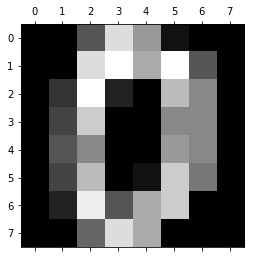

In [12]:
from sklearn.datasets import load_digits
digits_X,digits_y = load_digits(return_X_y=True)
digits = load_digits()
import matplotlib.pyplot as plt 
print digits_y
print digits.data 
print digits.target_names
plt.gray()
plt.matshow(digits.images[0]) 

plt.show()

Particionar los datos en dos conjuntos dijuntos de entrenamiento y testeo:

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.concat([pd.DataFrame(digits_X),pd.DataFrame(digits_y,columns=['y'])],axis=1)

train, test = train_test_split(df, test_size = 0.2)
train

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
1433,0.0,0.0,3.0,12.0,15.0,11.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,13.0,16.0,12.0,0.0,0.0,8
1727,0.0,0.0,6.0,11.0,16.0,13.0,5.0,0.0,0.0,2.0,...,0.0,0.0,0.0,5.0,14.0,11.0,6.0,0.0,0.0,3
1441,0.0,0.0,6.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,13.0,16.0,12.0,1.0,0.0,6
1216,0.0,2.0,9.0,15.0,16.0,15.0,2.0,0.0,0.0,11.0,...,0.0,0.0,0.0,12.0,16.0,15.0,9.0,1.0,0.0,3
1029,0.0,0.0,3.0,12.0,12.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.0,11.0,1.0,0.0,0.0,0
82,0.0,0.0,0.0,10.0,15.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,9.0,15.0,16.0,11.0,0.0,6
721,0.0,0.0,9.0,16.0,16.0,9.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,9.0,16.0,13.0,1.0,0.0,0.0,2
853,0.0,4.0,16.0,15.0,1.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,3.0,16.0,16.0,16.0,16.0,8.0,0.0,2
120,0.0,0.0,6.0,13.0,2.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,9.0,14.0,4.0,0.0,0.0,0.0,5
356,0.0,0.0,2.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,5.0,0.0,0.0,0.0,4


Extraer atributos de las imágenes para ser utilizados en el modelo de clasificación. Para esto, investigar las clases de Principal Component Analysis (PCA) del paquete sklearn.decomposition:

In [14]:
from sklearn.decomposition import PCA
#Cantidad de features a considerar
n_components = 64
pca = PCA(n_components = n_components)
pca.fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)

**PREGUNTA: Explique el método de reducción de dimensionalidad y justifique su elección.**

**RESPUESTA:** Los métodos de reducción de dimensionalidad son técnicas estadísticas que mapean el conjunto de los datos a subespacios derivados del espacio original, de menor dimensión, que permiten hacer una descripción de los datos a un menor costo.
PCA construye una transformación lineal que escoge un nuevo sistema de coordenadas para el conjunto original de datos en el cual la varianza de mayor tamaño del conjunto de datos es reflejada en el primer eje (llamado primer componente principal), la segunda varianza más grande es el segundo eje, y así sucesivamente. Para construir esta transformación lineal debe construirse primero la matriz de covarianza o matriz de coeficientes de correlación. Debido a la simetría de esta matriz existe una base completa de vectores propios de la misma. La transformación que lleva de las antiguas coordenadas a las coordenadas de la nueva base es precisamente la transformación lineal necesaria para reducir la dimensionalidad de datos
La elección del método PCA es que permite generar un nuevo conjunto de variables llamadas componentes principales, cada componente principal es la combinación lineal de las variables originales, en la cual todos los componentes principales son ortogonales entre sí, esto permite evitar la información redunadante. Este método es efectivo cuando la correlación entre las variables es alta, es decir; la linealidad entre las variables no es cero.

### Elija dos algoritmos de aprendizaje y entrene e intente obtener los mejores modelos de clasificación posibles:

Veremos los resultados para una Red Neuronal, un Árbol de Decisión y un KNN. Comenzaremos construyendo una gridsearch para la red neuronal, con el fin de seleccionar los mejores parámetros para construir el estimador, luego predecimos los valores del conjunto de prueba. Luego se realizan los mismos pasos para el árbol de decisón y el KNN secuencialmente.

A continuación seleccionamos los mejores parámetros para el PCA y la red neuronal mediante un gridsearch.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

#definimos el pipeline
pipe_ann = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', MLPClassifier())
])

N_FEATURES_OPTIONS = [7,30,63] 
C_OPTIONS = [(400,400,400,400,400),(1000,1000,1000,1000,1000)]
param_grid_ann = [
    {
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'reduce_dim__whiten': [True,False],
        'classify__hidden_layer_sizes': C_OPTIONS
    }
]
#generamos un grid search para obtener el fit con los mejores parámetros
grid_ann = GridSearchCV(pipe_ann, cv=3, n_jobs=2, param_grid=param_grid_ann)
grid_ann.fit(train.iloc[:,:63], train.y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=2,
       param_grid=[{'classify__hidden_layer_sizes': [(400, 400, 400, 400, 400), (1000, 1000, 1000, 1000, 1000)], 'reduce_dim__whiten': [True, False], 'reduce_dim__n_components': [7, 30, 63]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Se predicen los valores del conjunto de test utilizando el grid search creado para la ANN entrenada.

In [16]:
best_parameters_ann = grid_ann.best_estimator_.get_params()
print best_parameters_ann['reduce_dim__n_components']
print best_parameters_ann['reduce_dim__whiten']
print best_parameters_ann['classify__hidden_layer_sizes']
#se predicen los valores a partir del grid search
ann_out = grid_ann.predict(test.iloc[:,:63])

30
True
(1000, 1000, 1000, 1000, 1000)


A continuación se repite el procedimiento, comenzando con el pipeline para el arbol de decisón:

In [17]:
#definimos el pipeline
pipe_dt = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', tree.DecisionTreeClassifier())
])

N_FEATURES_OPTIONS = [7,30,63] 

param_grid_dt = [
    {
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'reduce_dim__whiten': [True,False],
    }
]
#generamos un grid search para obtener el fit con los mejores parámetros
grid_dt = GridSearchCV(pipe_dt, cv=3, n_jobs=2, param_grid=param_grid_dt)
grid_dt.fit(train.iloc[:,:63], train.y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=2,
       param_grid=[{'reduce_dim__whiten': [True, False], 'reduce_dim__n_components': [7, 30, 63]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

A continuación predecimos los valores del conjunto de prueba con el árbol recién entrenado:

In [18]:
best_parameters_dt = grid_dt.best_estimator_.get_params()
print best_parameters_dt['reduce_dim__n_components']
print best_parameters_dt['reduce_dim__whiten']

#se predicen los valores a partir del grid search
dt_out = grid_dt.predict(test.iloc[:,:63])


7
True


Repetimos el procedimiento completo para el algoritmo KNN.

In [19]:
#definimos el pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', KNeighborsClassifier())
])

N_FEATURES_OPTIONS = [7,30,63] 
N_NEIGHBORS = [1,3,5]

param_grid_knn = [
    {
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'reduce_dim__whiten': [True,False],
        'classify__n_neighbors': N_NEIGHBORS
    }
]
#generamos un grid search para obtener el fit con los mejores parámetros
grid_knn = GridSearchCV(pipe_knn, cv=3, n_jobs=2, param_grid=param_grid_knn)
grid_knn.fit(train.iloc[:,:63], train.y)

best_parameters_knn = grid_knn.best_estimator_.get_params()
print best_parameters_knn['reduce_dim__n_components']
print best_parameters_knn['reduce_dim__whiten']
print best_parameters_knn['classify__n_neighbors']

#se predicen los valores a partir del grid search
knn_out = grid_knn.predict(test.iloc[:,:63])

30
False
1


### Imprima los mejores resultados de precision, recall y accuracy para los algoritmos seleccionados:

In [20]:
from sklearn.metrics import precision_recall_fscore_support
print precision_recall_fscore_support(test.y, ann_out, average='macro')
print precision_recall_fscore_support(test.y, dt_out, average='macro')
print precision_recall_fscore_support(test.y, knn_out, average='macro')

(0.98662758809817641, 0.98472222222222228, 0.98517798439773629, None)
(0.8662284511386199, 0.86509574430766989, 0.86440562018828948, None)
(0.98968695523163086, 0.99019010705057209, 0.98975303038496654, None)


**PREGUNTA: Analice los resultados obtenidos.**

**RESPUESTA:**
Se puede observar que el algoritmo que da mejores resultados es el KNN con K=1. Esto se puede deber a que el algoritmo funciona bien calculando distancias dado que los valores de los atributos son numéricos.
El segundo mejor fue la red neuronal con (400,400,400,400,400) neuronas por capa. Entendemos que este algoritmo funciona muy bien para la clasificación de imágenes. Si bien se entrenó con cantidades bastante más grandes de neuronas, se obtuvo un mejor rendimiento con una combinación menor, lo que da entender que una cantidad mayor de neuronas no necesariamente da un mejor resultado.
Por último, el árbol de decisión dio buenos resultados pero mostró menor rendimiento que los 2 algoritmos anteriores. Los árboles de decisión funcionan bien cuando las features son atributos categoriales y sin muchos valores posibles. En este caso estamos enfrentados a un problema donde los valores son diversos.